In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
columns = ['age', 'workClass', 'fnlwgt', 'education', 'education-num','marital-status', 'occupation', 'relationship',
          'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

cat_columns = ['workClass', 'education', 'marital-status', 'occupation', 
        'relationship', 'race', 'sex', 'native-country', 'income']
numeric_columns = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

<h4>Part1 Dealing with Missing Values </h4>

In [3]:
train_data = pd.read_csv('data/adult.data', names=columns, sep=' *, *', na_values='?')
# test data has NAN on first row so skip the first row
test_data  = pd.read_csv('data/adult.test', names=columns, skiprows=1, sep=' *, *', na_values='?')

So there are 32561 samples with both categorial and numerical columns. workClass, occupation and native-country has missing values

In [4]:
data = pd.concat([train_data, test_data], axis=0)
data.isnull().sum()

age                  0
workClass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

In [5]:
from sklearn.impute import SimpleImputer
import numpy as np
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer = imputer.fit(data[['workClass','occupation','native-country' ]].values)
imputed_cat_data = imputer.transform(data[['workClass','occupation','native-country']].values)
imputed_cat_data.shape

(48842, 3)

In [6]:
pd.options.mode.chained_assignment = None
data['workClass'] = imputed_cat_data[:,0]
data['occupation'] = imputed_cat_data[:,1]
data['native-country'] = imputed_cat_data[:,2]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 16280
Data columns (total 15 columns):
age               48842 non-null int64
workClass         48842 non-null object
fnlwgt            48842 non-null int64
education         48842 non-null object
education-num     48842 non-null int64
marital-status    48842 non-null object
occupation        48842 non-null object
relationship      48842 non-null object
race              48842 non-null object
sex               48842 non-null object
capital-gain      48842 non-null int64
capital-loss      48842 non-null int64
hours-per-week    48842 non-null int64
native-country    48842 non-null object
income            48842 non-null object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


In [7]:
data['income'] = data['income'].apply(lambda x: 0 if x == '<=50K' else 1)
data.head()

,age,workClass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [8]:
def convertCatColumn(df, col):
    df = pd.concat([df, pd.get_dummies(df[col],prefix=col,prefix_sep=':')], axis=1)
    return df

clean_data = convertCatColumn(data, 'workClass')
clean_data = convertCatColumn(clean_data, 'marital-status')
clean_data = convertCatColumn(clean_data, 'occupation')
clean_data = convertCatColumn(clean_data, 'relationship')
clean_data = convertCatColumn(clean_data, 'race')
clean_data = convertCatColumn(clean_data, 'sex')
clean_data = convertCatColumn(clean_data, 'native-country')

clean_data.drop('education', axis=1,inplace=True)
clean_data.drop('workClass', axis=1,inplace=True)
clean_data.drop('marital-status', axis=1,inplace=True)
clean_data.drop('occupation', axis=1,inplace=True)
clean_data.drop('relationship', axis=1,inplace=True)
clean_data.drop('race', axis=1,inplace=True)
clean_data.drop('sex', axis=1,inplace=True)
clean_data.drop('native-country', axis=1,inplace=True)
clean_data.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,workClass:Federal-gov,workClass:Local-gov,workClass:Never-worked,...,native-country:Portugal,native-country:Puerto-Rico,native-country:Scotland,native-country:South,native-country:Taiwan,native-country:Thailand,native-country:Trinadad&Tobago,native-country:United-States,native-country:Vietnam,native-country:Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<h4>Part 2: Train Test Validate Split</h4>

In [9]:
features = clean_data.drop('income', axis=1)
labels = clean_data['income']

In [10]:
from sklearn.model_selection  import train_test_split
SEED = 42
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.40, random_state=SEED)
X_test, X_val, y_test, y_val= train_test_split(X_test, y_test, test_size=0.5, random_state=SEED)

In [11]:
for dataset in [y_train, y_val, y_test]:
    print(round(len(dataset)/ len(labels), 2))

0.6
0.2
0.2


<h4>Part 3: Build different five different variations sklearn models and a Dummy</h4>

In [21]:
# Get baseline results here with logisic regression and random forest

from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score

stdsc = StandardScaler()

# Set up your models here
def model_one():
    model = DummyClassifier(strategy="stratified", random_state=SEED)
    return model

def model_two():
    model = DecisionTreeClassifier(max_depth=5, random_state=SEED)
    return model

def model_three():
    model = KNeighborsClassifier(n_neighbors=3)
    return model

def model_four():
    model = LogisticRegression(random_state=SEED)
    return model

def model_five():
    model = LinearSVC(random_state=SEED, tol=1e-5)
    return model

# Perform preliminary evaluations here
model1, model2, model3, model4, model5  = model_one(), model_two(), model_three(), model_four(), model_five()

accuracies = []
precisions = []
recalls = []
X_trans_scd = stdsc.fit_transform(X_train)
X_val_scd  = stdsc.transform(X_val)

for model in [model1, model2, model3, model4, model5]:
    model.fit(X_trans_scd, y_train)
    y_pred = model.predict(X_val_scd)
    accuracy = round(accuracy_score(y_val, y_pred),3)
    precision = round(precision_score(y_val, y_pred),3)
    recall = round(recall_score(y_val, y_pred),3)
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    print('acc: {} precision: {} recal: {}'.format(accuracy, precision, recall))

acc: 0.498 precision: 0.491 recal: 0.481
acc: 0.645 precision: 0.664 recal: 0.568
acc: 0.58 precision: 0.579 recal: 0.544
acc: 0.637 precision: 0.643 recal: 0.592
acc: 0.635 precision: 0.641 recal: 0.593


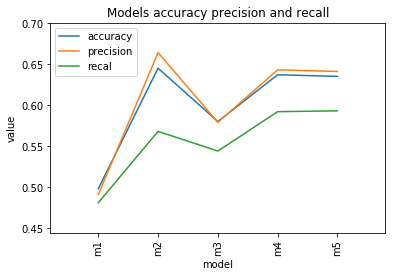

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

x=[1,2,3,4,5]
labels = ['m1', 'm2', 'm3', 'm4', 'm5']

plt.plot(x, accuracies)
plt.plot(x, precisions)
plt.plot(x, recalls)
plt.xticks(x, labels, rotation='vertical')
plt.margins(0.2)
plt.subplots_adjust(bottom=0.15)

plt.title('Models accuracy precision and recall')
plt.ylabel('value')
plt.xlabel('model')
plt.legend(['accuracy', 'precision', 'recal'], loc='upper left')
plt.show()

<h4>Preliminary conclusions on your models</h4>

<p>Model two(DecessionTreeClassifier) has higger accuracy and precession than others) and model 4(LogisticRegression) higer precission. on the other hand model5(LinearSVC) has recall</p>

<h4>Part 4: Cross-validation</h4>

In [23]:
from sklearn.model_selection import cross_validate

model1, model2, model3, model4, model5  = model_one(), model_two(), model_three(), model_four(), model_five()


cv_test_results = []
for model in [model1, model2, model3, model4, model5]:
    cv_results = cross_validate(model, X_trans_scd, y_train, cv=5)
    print(cv_results['test_score'])

[0.49752602 0.49616106 0.5034977  0.50929875 0.50110903]
[0.65688449 0.64186999 0.65500768 0.64238185 0.64784167]
[0.59494967 0.58658932 0.58385941 0.57993516 0.59972701]
[0.66166183 0.64272308 0.65125405 0.64664733 0.64118751]
[0.65978502 0.63828698 0.65142467 0.64391742 0.64630609]


<p>Yes. after validating with cross-validation there are improvement in scores. It is shown that model(LogisticRegression) has highest score</p>

<h4>Part 5: Refining with Regularization</h4>

In [28]:
lr_l1 = LogisticRegression(penalty='l1', solver='liblinear', multi_class='ovr')
lr_l2 = LogisticRegression(penalty='l2', solver='liblinear', multi_class='ovr')

learnSVC_l1 = LinearSVC(penalty='l1', loss='squared_hinge', dual=False, tol=1e-3)
learnSVC_l2 = LinearSVC(penalty='l2', loss='squared_hinge', dual=False, tol=1e-3)

accuracies_lagularized = []
precisions_lagularized = []
recalls_lagularized = []

for model in [lr_l1, lr_l2, learnSVC_l1, learnSVC_l2]:
    model.fit(X_trans_scd, y_train)
    y_pred = model.predict(X_val_scd)
    accuracy = round(accuracy_score(y_val, y_pred),3)
    precision = round(precision_score(y_val, y_pred),3)
    recall = round(recall_score(y_val, y_pred),3)
    accuracies_lagularized.append(accuracy)
    precisions_lagularized.append(precision)
    recalls_lagularized.append(recall)
    print('acc: {} precision: {} recal: {}'.format(accuracy, precision, recall))


acc: 0.637 precision: 0.644 recal: 0.592
acc: 0.637 precision: 0.643 recal: 0.592
acc: 0.639 precision: 0.646 recal: 0.593
acc: 0.639 precision: 0.646 recal: 0.592


<p> So model with regularization increaase accurrracy a bit for both case but no there is no difference in between L1 and l2 </p.

In [29]:
# apply cross validation
lr_l1 = LogisticRegression(penalty='l1', solver='liblinear', multi_class='ovr')
lr_l2 = LogisticRegression(penalty='l2', solver='liblinear', multi_class='ovr')

learnSVC_l1 = LinearSVC(penalty='l1', loss='squared_hinge', dual=False, tol=1e-3)
learnSVC_l2 = LinearSVC(penalty='l2', loss='squared_hinge', dual=False, tol=1e-3)
cv_test_results = []

for model in [lr_l1, lr_l2, learnSVC_l1, learnSVC_l2]:
    cv_results = cross_validate(model, X_trans_scd, y_train, cv=5)
    print(cv_results['test_score'])

[0.66234431 0.64255247 0.65108343 0.64630609 0.64118751]
[0.66149121 0.64272308 0.65125405 0.64664733 0.64118751]
[0.66200307 0.64425866 0.6543252  0.64801228 0.6428937 ]
[0.66200307 0.64408804 0.6543252  0.64767105 0.64272308]


<p>with cross validation we saw the results is better than previous cross validatio results. Yes Regularization ahas effect on score. but difference between l1 and l2 is not shown here in this dataset</p>


<h4>Overall Conclusion</h4>

In [ ]:
<p>After this analysis. for all the model the overall validation score is 60%. After apply crossvalidation it observed that validation score slitly improved
it also noted that after applying L1 and L2 we saw a little bit improved but we did not oberserved any signification differnce between L1 and 
</p>